In [170]:
import pandas as pd
import numpy as np

In [171]:
combine_data_2013 = pd.read_csv('../data/combine_data_2013.csv')
combine_data_2014 = pd.read_csv('../data/combine_data_2014.csv')
combine_data_2015 = pd.read_csv('../data/combine_data_2015.csv')
combine_data_2016 = pd.read_csv('../data/combine_data_2016.csv')
combine_data_2017 = pd.read_csv('../data/combine_data_2017.csv')

In [172]:
player_data_2013 = pd.read_csv('../data/player_data_2013.csv')
player_data_2014 = pd.read_csv('../data/player_data_2014.csv')
player_data_2015 = pd.read_csv('../data/player_data_2015.csv')
player_data_2016 = pd.read_csv('../data/player_data_2016.csv')
player_data_2017 = pd.read_csv('../data/player_data_2017.csv')

Note that here we will start our data cleaning
- we will focus on cleaning up the combine pandas dataframe to include players name and the six combine workout that each player is evaulated upon

- we will also focus on cleaning up the player pandas dataframe to include the players name and the games played

In [173]:
combine_data_2013 = combine_data_2013[['Player', '40yd', 'Vertical','Bench', 'BroadJump', '3Cone', 'Shuttle']]
combine_data_2014 = combine_data_2014[['Player', '40yd', 'Vertical','Bench', 'BroadJump', '3Cone', 'Shuttle']]
combine_data_2015 = combine_data_2015[['Player', '40yd', 'Vertical','Bench', 'BroadJump', '3Cone', 'Shuttle']]
combine_data_2016 = combine_data_2016[['Player', '40yd', 'Vertical','Bench', 'BroadJump', '3Cone', 'Shuttle']]
combine_data_2017 = combine_data_2017[['Player', '40yd', 'Vertical','Bench', 'BroadJump', '3Cone', 'Shuttle']]
combine_data_2017

,Player,40yd,Vertical,Bench,BroadJump,3Cone,Shuttle
0,Jamal Adams,4.56,31.5,18.0,120.0,6.96,4.13
1,Montravius Adams,4.87,29.0,22.0,108.0,7.62,4.89
2,Rodney Adams,4.44,29.5,8.0,125.0,6.98,4.28
3,Quincy Adeboyejo,4.42,34.5,8.0,123.0,6.73,4.14
4,Brian Allen,4.48,34.5,15.0,117.0,6.64,4.34
...,...,...,...,...,...,...,...
322,Jesus Wilson,4.57,NaN,10.0,119.0,NaN,4.57
323,Quincy Wilson,4.54,32.0,14.0,118.0,6.86,4.02
324,Ahkello Witherspoon,4.45,40.5,NaN,127.0,6.93,4.13
325,Xavier Woods,4.54,33.5,19.0,122.0,6.72,4.13


In [174]:
player_data_2013 = player_data_2013[['PlayerName','Games']]
player_data_2014 = player_data_2014[['PlayerName','Games']]
player_data_2015 = player_data_2015[['PlayerName','Games']]
player_data_2016 = player_data_2016[['PlayerName','Games']]
player_data_2017 = player_data_2017[['PlayerName','Games']]
player_data_2017

,PlayerName,Games
0,Player,G
1,Todd Gurley*+,15
2,Le'Veon Bell*+,15
3,Kareem Hunt*,16
4,LeSean McCoy*,16
...,...,...
530,Nick Bellore,13
531,Justin Davis,4
532,Matt Hazel,4
533,Devante Mays,8


We will now drop any rows that have a NaN value. This is more specifically common in our NFL Combine data as there are participants who only do certain exercises and not all due to position, injury, etc. However just to make sure we will do the same for the player data as well.

NOTE 
We don't want to use a function like SimpleImputer from Scikit-Learn due to the fact that we don't want to assume what another combine players stats could be just because they are the most frequent

In [175]:
combine_data_2013 = combine_data_2013.dropna()
combine_data_2014 = combine_data_2014.dropna()
combine_data_2015 = combine_data_2015.dropna()
combine_data_2016 = combine_data_2016.dropna()
combine_data_2017 = combine_data_2017.dropna()
combine_data_2017

,Player,40yd,Vertical,Bench,BroadJump,3Cone,Shuttle
0,Jamal Adams,4.56,31.5,18.0,120.0,6.96,4.13
1,Montravius Adams,4.87,29.0,22.0,108.0,7.62,4.89
2,Rodney Adams,4.44,29.5,8.0,125.0,6.98,4.28
3,Quincy Adeboyejo,4.42,34.5,8.0,123.0,6.73,4.14
4,Brian Allen,4.48,34.5,15.0,117.0,6.64,4.34
...,...,...,...,...,...,...,...
316,Marcus Williams,4.56,43.5,14.0,129.0,6.85,4.20
318,Stanley Williams,4.51,36.0,18.0,121.0,6.86,4.18
320,Jordan Willis,4.53,39.0,24.0,125.0,6.85,4.28
323,Quincy Wilson,4.54,32.0,14.0,118.0,6.86,4.02


In [176]:
player_data_2013 = player_data_2013.dropna()
player_data_2014 = player_data_2014.dropna()
player_data_2015 = player_data_2015.dropna()
player_data_2016 = player_data_2016.dropna()
player_data_2017 = player_data_2017.dropna()
player_data_2017

,PlayerName,Games
0,Player,G
1,Todd Gurley*+,15
2,Le'Veon Bell*+,15
3,Kareem Hunt*,16
4,LeSean McCoy*,16
...,...,...
530,Nick Bellore,13
531,Justin Davis,4
532,Matt Hazel,4
533,Devante Mays,8


We are now going to try and seperate our data into binary (1- played a snap 0-did not play a snap) in order to tell if a player that participated in the combine every played an NFL snap his rookie year

But first we need to remove special characters from players names in the player data DF

In [177]:
player_data_2013['PlayerName'] = player_data_2013['PlayerName'].replace('[^a-zA-Z ]', '', regex=True)
player_data_2014['PlayerName'] = player_data_2014['PlayerName'].replace('[^a-zA-Z ]', '', regex=True)
player_data_2015['PlayerName'] = player_data_2015['PlayerName'].replace('[^a-zA-Z ]', '', regex=True)
player_data_2016['PlayerName'] = player_data_2016['PlayerName'].replace('[^a-zA-Z ]', '', regex=True)
player_data_2017['PlayerName'] = player_data_2017['PlayerName'].replace('[^a-zA-Z ]', '', regex=True)

In [178]:
played_game_2013 = pd.merge(combine_data_2013[['Player']], player_data_2013[['PlayerName', 'Games']], how='left', left_on='Player', right_on='PlayerName').fillna(0)
played_game_2013['PlayedGame'] = (pd.to_numeric(played_game_2013['Games'], errors='coerce') > 0).astype(int)
played_game_2013 = played_game_2013[['Player', 'PlayedGame']].rename(columns={'Player': 'PlayerName'})

played_game_2014 = pd.merge(combine_data_2014[['Player']], player_data_2014[['PlayerName', 'Games']], how='left', left_on='Player', right_on='PlayerName').fillna(0)
played_game_2014['PlayedGame'] = (pd.to_numeric(played_game_2014['Games'], errors='coerce') > 0).astype(int)
played_game_2014 = played_game_2014[['Player', 'PlayedGame']].rename(columns={'Player': 'PlayerName'})

played_game_2015 = pd.merge(combine_data_2015[['Player']], player_data_2015[['PlayerName', 'Games']], how='left', left_on='Player', right_on='PlayerName').fillna(0)
played_game_2015['PlayedGame'] = (pd.to_numeric(played_game_2015['Games'], errors='coerce') > 0).astype(int)
played_game_2015 = played_game_2015[['Player', 'PlayedGame']].rename(columns={'Player': 'PlayerName'})

played_game_2016 = pd.merge(combine_data_2016[['Player']], player_data_2016[['PlayerName', 'Games']], how='left', left_on='Player', right_on='PlayerName').fillna(0)
played_game_2016['PlayedGame'] = (pd.to_numeric(played_game_2016['Games'], errors='coerce') > 0).astype(int)
played_game_2016 = played_game_2016[['Player', 'PlayedGame']].rename(columns={'Player': 'PlayerName'})

played_game_2017 = pd.merge(combine_data_2017[['Player']], player_data_2017[['PlayerName', 'Games']], how='left', left_on='Player', right_on='PlayerName').fillna(0)
played_game_2017['PlayedGame'] = (pd.to_numeric(played_game_2017['Games'], errors='coerce') > 0).astype(int)
played_game_2017 = played_game_2017[['Player', 'PlayedGame']].rename(columns={'Player': 'PlayerName'})
played_game_2013

,PlayerName,PlayedGame
0,Oday Aboushi,0
1,Robert Alford,0
2,C.J. Anderson,0
3,Ziggy Ansah,0
4,Marc Anthony,0
...,...,...
156,Marquess Wilson,1
157,Robert Woods,1
158,Khalid Wooten,0
159,Tom Wort,0


Now we will combine the PlayedGame column with our in our played_game_xxxx dataframe with our combine_data_xxxx dataframe based on the Players Name

In [179]:
merged_player_data_2013 = pd.merge(combine_data_2013, player_data_2013, how='left', left_on='Player', right_on='PlayerName')
merged_player_data_2013 = pd.merge(merged_player_data_2013, played_game_2013, how='left', left_on='Player', right_on='PlayerName')
merged_player_data_2013['Games'] = merged_player_data_2013['Games'].fillna(0)
merged_player_data_2013['Games'] = pd.to_numeric(merged_player_data_2013['Games'], errors='coerce')
merged_player_data_2013['PlayedGame'] = merged_player_data_2013['Games'].apply(lambda x: 1 if x > 0 else 0)
merged_player_data_2013 = merged_player_data_2013.drop(['PlayerName_x','PlayerName_y'],axis=1)

merged_player_data_2014 = pd.merge(combine_data_2014, player_data_2014, how='left', left_on='Player', right_on='PlayerName')
merged_player_data_2014 = pd.merge(merged_player_data_2014, played_game_2014, how='left', left_on='Player', right_on='PlayerName')
merged_player_data_2014['Games'] = merged_player_data_2014['Games'].fillna(0)
merged_player_data_2014['Games'] = pd.to_numeric(merged_player_data_2014['Games'], errors='coerce')
merged_player_data_2014['PlayedGame'] = merged_player_data_2014['Games'].apply(lambda x: 1 if x > 0 else 0)
merged_player_data_2014 = merged_player_data_2014.drop(['PlayerName_x','PlayerName_y'],axis=1)

merged_player_data_2015 = pd.merge(combine_data_2015, player_data_2015, how='left', left_on='Player', right_on='PlayerName')
merged_player_data_2015 = pd.merge(merged_player_data_2015, played_game_2015, how='left', left_on='Player', right_on='PlayerName')
merged_player_data_2015['Games'] = merged_player_data_2015['Games'].fillna(0)
merged_player_data_2015['Games'] = pd.to_numeric(merged_player_data_2015['Games'], errors='coerce')
merged_player_data_2015['PlayedGame'] = merged_player_data_2015['Games'].apply(lambda x: 1 if x > 0 else 0)
merged_player_data_2015 = merged_player_data_2015.drop(['PlayerName_x','PlayerName_y'],axis=1)

merged_player_data_2016 = pd.merge(combine_data_2016, player_data_2016, how='left', left_on='Player', right_on='PlayerName')
merged_player_data_2016 = pd.merge(merged_player_data_2016, played_game_2016, how='left', left_on='Player', right_on='PlayerName')
merged_player_data_2016['Games'] = merged_player_data_2016['Games'].fillna(0)
merged_player_data_2016['Games'] = pd.to_numeric(merged_player_data_2016['Games'], errors='coerce')
merged_player_data_2016['PlayedGame'] = merged_player_data_2016['Games'].apply(lambda x: 1 if x > 0 else 0)
merged_player_data_2016 = merged_player_data_2016.drop(['PlayerName_x','PlayerName_y'],axis=1)

merged_player_data_2017 = pd.merge(combine_data_2017, player_data_2017, how='left', left_on='Player', right_on='PlayerName')
merged_player_data_2017 = pd.merge(merged_player_data_2017, played_game_2017, how='left', left_on='Player', right_on='PlayerName')
merged_player_data_2017['Games'] = merged_player_data_2017['Games'].fillna(0)
merged_player_data_2017['Games'] = pd.to_numeric(merged_player_data_2017['Games'], errors='coerce')
merged_player_data_2017['PlayedGame'] = merged_player_data_2017['Games'].apply(lambda x: 1 if x > 0 else 0)
merged_player_data_2017 = merged_player_data_2017.drop(['PlayerName_x','PlayerName_y'],axis=1)


merged_player_data = pd.concat([merged_player_data_2013,merged_player_data_2014,merged_player_data_2015,merged_player_data_2016 ,merged_player_data_2017], axis=0, ignore_index=True)
merged_player_data

,Player,40yd,Vertical,Bench,BroadJump,3Cone,Shuttle,Games,PlayedGame
0,Oday Aboushi,5.41,23.5,17.0,100.0,7.92,4.84,0,0
1,Robert Alford,4.39,40.0,17.0,132.0,6.89,4.23,0,0
2,C.J. Anderson,4.60,32.0,17.0,119.0,7.15,4.12,0,0
3,Ziggy Ansah,4.56,34.5,21.0,118.0,7.11,4.26,0,0
4,Marc Anthony,4.63,35.0,12.0,118.0,6.74,4.07,0,0
...,...,...,...,...,...,...,...,...,...
795,Marcus Williams,4.56,43.5,14.0,129.0,6.85,4.20,15,1
796,Stanley Williams,4.51,36.0,18.0,121.0,6.86,4.18,0,0
797,Jordan Willis,4.53,39.0,24.0,125.0,6.85,4.28,0,0
798,Quincy Wilson,4.54,32.0,14.0,118.0,6.86,4.02,0,0


In [180]:
T = merged_player_data['PlayedGame']
X = merged_player_data.loc[:, (merged_player_data.columns != "PlayedGame") & (merged_player_data.columns != "Player")]
X

,40yd,Vertical,Bench,BroadJump,3Cone,Shuttle,Games
0,5.41,23.5,17.0,100.0,7.92,4.84,0
1,4.39,40.0,17.0,132.0,6.89,4.23,0
2,4.60,32.0,17.0,119.0,7.15,4.12,0
3,4.56,34.5,21.0,118.0,7.11,4.26,0
4,4.63,35.0,12.0,118.0,6.74,4.07,0
...,...,...,...,...,...,...,...
795,4.56,43.5,14.0,129.0,6.85,4.20,15
796,4.51,36.0,18.0,121.0,6.86,4.18,0
797,4.53,39.0,24.0,125.0,6.85,4.28,0
798,4.54,32.0,14.0,118.0,6.86,4.02,0


In [181]:
from sklearn.model_selection import train_test_split
X_train, X_test, t_train, t_test = train_test_split(X, T, test_size = .20, random_state = 0)


print(X.shape, X_train.shape, X_test.shape, t_train.shape, t_test.shape)

(800, 7) (640, 7) (160, 7) (640,) (160,)


In [182]:
#Calculate R^2 Value
from sklearn.linear_model import LinearRegression

np.random.seed(0)

# 1) initialize
model = LinearRegression()

# 2) train the model
model.fit(X_train, t_train)

# 3) evaluate
test_score = model.score(X_test,t_test)

print("Test score: ", test_score)

Test score:  0.8766973463722737


Using a simple Linear Regression model it appears that our R^2 value is not very promising as we scored worse than a simple meaning model(score<0)

Note that a score of 1 would be perfect

lets see what this looks like when plotted

(160,)


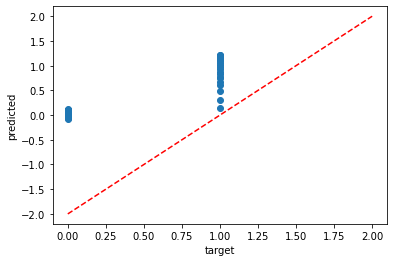

In [183]:
import matplotlib.pyplot as plt 

y=model.predict(X_test)

plt.scatter(t_test, y)



# dashed diagonal line
plt.plot([0,2], [-2,2], 'r--')
# x and y labels
plt.xlabel("target")
plt.ylabel("predicted")

print(y.shape)

In [184]:
from sklearn.metrics import mean_squared_error
predictions = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(t_test, predictions))

print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 0.12749792522723288


This model also does not seem to measure Root Mean Squared Error very well either as it is being tested against binary values 1 - played a game or 0 - did not play a game. Therefore for this to be a fairly accurate model it needs to be much closer to 0.

Lets try taking a different approach. 

Now we will try the five models proposed in the paper our research is based off of "NFL Career Success as Predicted by NFL Scouting Combine"
These models will be as follows
Support Vector Machine
Gradient Boosting
Random Forest Decision Tree
Multivariate Linear Regression
Decision Tree

Support Vector Machine (come back to getting weird error)

In [185]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

#parameters for SVC
# C - float - positive float
# Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive.
# kernel - {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} - default: 'rbf'
# Specifies the kernel type to be used in the algorithm. 'linear' uses a linear kernel, 'poly' uses a polynomial kernel, 'rbf' uses a radial basis function kernel, and 'sigmoid' uses a sigmoid kernel.
# degree - int - positive integer - applicable only to 'poly' kernel
# Degree of the polynomial kernel function ('poly'). Ignored by all other kernels.
# gamma - {'scale', 'auto'} or float - positive float - applicable to 'rbf', 'poly', and 'sigmoid' kernels
# Kernel coefficient for 'rbf', 'poly', and 'sigmoid'. If 'scale' is selected, it is calculated as 1 / (n_features * X.var()) and if 'auto', it uses 1 / n_features.
# probability - bool - True or False
# Whether to enable probability estimates. This must be enabled prior to calling `fit`, and it slows down the training process.

#create Support Vector Machine classifier
svm_classifier = SVC()



Gradient Boosting

In [186]:
from sklearn.ensemble import GradientBoostingClassifier

#paramters for GradientBoostingClassifier
# n_estimators - int - positive integer
# The number of boosting stages to be run. It represents the number of weak learners (trees) to train.
# learning_rate - float - (0.0, 1.0]
# The step size shrinkage used to prevent overfitting. Lower values make the model more robust but require more trees.]
# max_depth - int or None - positive integer or None
# The maximum depth of the individual trees. Higher values can lead to overfitting.
# subsample - float - (0.0, 1.0]
# The fraction of samples used for fitting the individual base learners. Can prevent overfitting.

#create gradient boosting classifier
gb_classifier = GradientBoostingClassifier()



Random Forest Decision Tree

In [187]:
from sklearn.ensemble import RandomForestClassifier

#parameters for RandomForestClassifier
# n_estimators - int - positive integer
# The number of trees in the forest. It represents the number of base learners to train.
# max_depth - int or None - positive integer or None
# The maximum depth of the individual trees. Higher values can lead to overfitting.
# min_samples_split - int or float - positive integer or float (0.0, 1.0]
# The minimum number of samples required to split an internal node. If float, it represents the fraction of total samples.
# min_samples_leaf - int or float - positive integer or float (0.0, 1.0]
# The minimum number of samples required to be at a leaf node. If float, it represents the fraction of total samples.

#create random forest decision tree classifier
rf_classifier = RandomForestClassifier()


Multivariate Linear Regression

In [188]:
from sklearn.linear_model import LinearRegression

#parameters for LinearRegression
# fit_intercept - bool - True or False
# Whether to calculate the intercept for this model. If False, the model is forced to pass through the origin.
# normalize - bool - True or False
# If True, the regressors (features) will be normalized before regression. Useful when the magnitudes of variables differ significantly.
# n_jobs - int - integer or None
# The number of jobs to use for the computation. Set to -1 to use all available processors. Useful for large datasets.
# positive - bool - True or False
# When set to True, forces the coefficients to be positive. Useful when you have prior knowledge that the relationship is expected to be positive.

#create linear regression classifier
linear_model = LinearRegression()

Decision Tree

In [189]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error

# criterion - {'mse', 'friedman_mse', 'mae'} - default: 'mse'
# The function to measure the quality of a split. 'mse' is mean squared error, 'friedman_mse' is mean squared error with Friedman's improvement, and 'mae' is mean absolute error.
# max_depth - int - positive integer or None
# The maximum depth of the tree. Higher values can lead to overfitting.
# min_samples_split - int or float - positive integer or float (0.0, 1.0]
# The minimum number of samples required to split an internal node. If float, it represents the fraction of total samples.
# min_samples_leaf - int or float - positive integer or float (0.0, 1.0]
# The minimum number of samples required to be at a leaf node. If float, it represents the fraction of total samples.
# random_state - int, RandomState instance, or None
# Controls the randomness of the estimator. If int, it fixes the seed; if RandomState instance, it uses it; if None, randomness is determined by the RNG.

#crate decision tree classifier
tree_regressor = DecisionTreeClassifier()


Models not included in paper but want to consider to due high rate of probability classification with binary target values from personal research

Logistic Regression

In [190]:
from sklearn.linear_model import LogisticRegression

#paramters that can be passed into LogisticRegression
# penalty - {'l1', 'l2', 'elasticnet', 'none'} - default: 'l2'
# Used to specify the norm used in the penalization. 'l1' and 'l2' are regularization terms, 'elasticnet' is a combination of both, and 'none' applies no regularization.
# C - float - positive float
# Inverse of regularization strength; smaller values specify stronger regularization. A lower C increases the regularization strength.
# max_iter - int - positive integer
# Maximum number of iterations for the solver to converge.
# solver - {'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'} - default: 'lbfgs'
# Algorithm to use in the optimization problem. 'liblinear' is suitable for small datasets, 'lbfgs' and 'newton-cg' handle multinomial loss, 'sag' uses stochastic average gradient descent, and 'saga' is a variant of 'sag'.

#create logistic regression classifier
lr = LogisticRegression(max_iter=1000)


k-Nearest Neighbors

In [191]:
from sklearn.neighbors import KNeighborsClassifier


#parameters that can be passed into KNeighborsClassifier
# n_neighbors - int - positive integer
# Number of neighbors to use for kneighbors queries. It defines the number of nearest neighbors considered when making predictions.
# weights - {'uniform', 'distance'} - default: 'uniform'
# Weight function used in prediction. 'uniform' assigns equal weights to all neighbors, while 'distance' assigns weights based on the inverse of the distance.
# algorithm - {'auto', 'ball_tree', 'kd_tree', 'brute'} - default: 'auto'
# Algorithm used to compute the nearest neighbors. 'auto' automatically selects the most appropriate algorithm based on the input data.
# p - int - 1 or 2
# Power parameter for the Minkowski metric. When p is set to 1, it corresponds to the Manhattan distance; when set to 2, it corresponds to the Euclidean distance.

#create K-Nearest Neighbor classifier
knn = KNeighborsClassifier()


Naive Bayesian

In [192]:
from sklearn.naive_bayes import GaussianNB

#parameters for GaussianNB
# priors - array-like, shape (n_classes,) - default: None
# Prior probabilities of the classes. If specified, the priors are not adjusted based on the data.
# var_smoothing - float - positive float
# Portion of the largest variance of all features added to variances for calculation stability. It represents the fraction of the largest variance to be added to the estimates for calculation stability.

#create Naive Bayesian classifier
bayes = GaussianNB()

Cross Validation and Accuracy Score

What we will do here is loop through all of our models and use cross evaluation as a way to compare models. At end we will take the mean accuracy score.

In [193]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score


T = T.astype('int')
X_train, X_test, t_train, t_test = train_test_split(X, T, test_size=0.20, random_state=0)

models = [["K-Nearest Neighbor",knn],["Naive Bayesian", bayes],["Support Vector Machine",svm_classifier],["Gradient Boosting",gb_classifier],["Random Forest Decision Tree",rf_classifier],["Decision Tree",tree_regressor],["Logistic Regression",lr]]

#loop through each model in models array
for model in models:
    #calculate accuracy score using cross-validation
    cv_accuracy = cross_val_score(model[1], X_train, t_train, cv=10, scoring='accuracy')
    avg_accuracy = np.mean(cv_accuracy)
    
    print("Model: ", model[0], "Average Accuracy: ", avg_accuracy)

Model:  K-Nearest Neighbor Average Accuracy:  0.9671875
Model:  Naive Bayesian Average Accuracy:  1.0
Model:  Support Vector Machine Average Accuracy:  0.9546875
Model:  Gradient Boosting Average Accuracy:  1.0
Model:  Random Forest Decision Tree Average Accuracy:  0.996875
Model:  Decision Tree Average Accuracy:  1.0
Model:  Logistic Regression Average Accuracy:  0.9953125


Now lets try and improve our model by feeding it different data.

Since some positions should/shouldn't have certains combine statistics. For example a lineman is not expected to run a 4.4 40 yard dash. Therefore do we need to add positions as an attribute that our model is run on. Lets test it.

In [194]:
#hashmap that will coordinate the numerical number assigned to each position group

#O-Line: 0
#D-Line DT/DE: 1
#Edge: 2
#QB: 3
#TE: 4
#WR: 5
#RB: 6
#CB/S: 7

position_map = {"OT":0,
               "CB":1,
               "WR":2,
               "P":3,
               "DE":4,
               "RB":5,
               "OG":6,
               "FB":7,
               "ILB":8,
               "TE":9,
               "OLB":10,
               "S":11,
               "K":12,
               "EDGE":13,
               "C":14,
               "DT":15,
               "QB":16,
               "DB":17,
               "DL":18,
               "LB":19,
               "OL":20,
               "LS":21}

In [195]:
combine_data_2013 = pd.read_csv('../data/combine_data_2013.csv')
combine_data_2014 = pd.read_csv('../data/combine_data_2014.csv')
combine_data_2015 = pd.read_csv('../data/combine_data_2015.csv')
combine_data_2016 = pd.read_csv('../data/combine_data_2016.csv')
combine_data_2017 = pd.read_csv('../data/combine_data_2017.csv')

In [196]:
combine_data_2013 = combine_data_2013[['Player','Pos']]
combine_data_2014= combine_data_2014[['Player','Pos']]
combine_data_2015= combine_data_2015[['Player','Pos']]
combine_data_2016= combine_data_2016[['Player','Pos']]
combine_data_2017= combine_data_2017[['Player','Pos']]
combine_data_2017

,Player,Pos
0,Jamal Adams,S
1,Montravius Adams,DT
2,Rodney Adams,WR
3,Quincy Adeboyejo,WR
4,Brian Allen,CB
...,...,...
322,Jesus Wilson,WR
323,Quincy Wilson,CB
324,Ahkello Witherspoon,CB
325,Xavier Woods,S


In [197]:
# Combine all combine_data DataFrames
combined_data = pd.concat([combine_data_2013,combine_data_2014,combine_data_2015,combine_data_2016,combine_data_2017], axis=0, ignore_index=True)

# Merge combined_data with merged_player_data
merged_player_data_with_pos = pd.merge(merged_player_data, combined_data, on='Player', how='left')

# Print the resulting DataFrame
print(merged_player_data_with_pos[['Player','Pos']])


               Player Pos
0        Oday Aboushi  OT
1       Robert Alford  CB
2       C.J. Anderson  RB
3         Ziggy Ansah  DE
4        Marc Anthony  CB
..                ...  ..
803   Marcus Williams   S
804  Stanley Williams  RB
805     Jordan Willis  DE
806     Quincy Wilson  CB
807      Xavier Woods   S

[808 rows x 2 columns]


In [198]:
merged_player_data_with_pos['Pos'] = merged_player_data_with_pos['Pos'].map(lambda x: position_map.get(x, x))
print(merged_player_data_with_pos)

               Player  40yd  Vertical  Bench  BroadJump  3Cone  Shuttle  \
0        Oday Aboushi  5.41      23.5   17.0      100.0   7.92     4.84   
1       Robert Alford  4.39      40.0   17.0      132.0   6.89     4.23   
2       C.J. Anderson  4.60      32.0   17.0      119.0   7.15     4.12   
3         Ziggy Ansah  4.56      34.5   21.0      118.0   7.11     4.26   
4        Marc Anthony  4.63      35.0   12.0      118.0   6.74     4.07   
..                ...   ...       ...    ...        ...    ...      ...   
803   Marcus Williams  4.56      43.5   14.0      129.0   6.85     4.20   
804  Stanley Williams  4.51      36.0   18.0      121.0   6.86     4.18   
805     Jordan Willis  4.53      39.0   24.0      125.0   6.85     4.28   
806     Quincy Wilson  4.54      32.0   14.0      118.0   6.86     4.02   
807      Xavier Woods  4.54      33.5   19.0      122.0   6.72     4.13   

     Games  PlayedGame  Pos  
0        0           0    0  
1        0           0    1  
2        

In [199]:
T = merged_player_data_with_pos['PlayedGame']
X = merged_player_data_with_pos.loc[:, (merged_player_data_with_pos.columns != "PlayedGame") & (merged_player_data_with_pos.columns != "Player") & (merged_player_data_with_pos.columns != "Pos_x") & (merged_player_data_with_pos.columns != "Pos_y")]


Classification Accuracy Given Player Position

In [200]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score


T = T.astype('int')
X_train, X_test, t_train, t_test = train_test_split(X, T, test_size=0.20, random_state=0)

models = [["K-Nearest Neighbor",knn],["Naive Bayesian", bayes],["Support Vector Machine",svm_classifier],["Gradient Boosting",gb_classifier],["Random Forest Decision Tree",rf_classifier],["Decision Tree",tree_regressor],["Logistic Regression",lr]]

#loop through each model in models array
for model in models:
    #calculate accuracy score using cross-validation
    cv_accuracy = cross_val_score(model[1], X_train, t_train, cv=10, scoring='accuracy')
    avg_accuracy = np.mean(cv_accuracy)
    
    print("Model: ", model[0], "Average Accuracy: ", avg_accuracy)

Model:  K-Nearest Neighbor Average Accuracy:  0.967548076923077
Model:  Naive Bayesian Average Accuracy:  1.0
Model:  Support Vector Machine Average Accuracy:  0.9582692307692309
Model:  Gradient Boosting Average Accuracy:  1.0
Model:  Random Forest Decision Tree Average Accuracy:  0.9984615384615385
Model:  Decision Tree Average Accuracy:  1.0
Model:  Logistic Regression Average Accuracy:  0.9938461538461538


Confusion Matrix

================K-Nearest Neighbor================
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       131
           1       1.00      0.94      0.97        31

    accuracy                           0.99       162
   macro avg       0.99      0.97      0.98       162
weighted avg       0.99      0.99      0.99       162



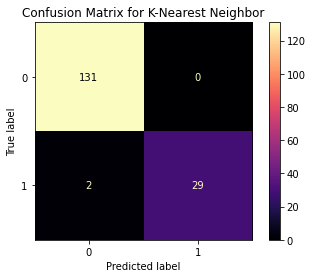

==================Naive Bayesian==================
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       131
           1       1.00      1.00      1.00        31

    accuracy                           1.00       162
   macro avg       1.00      1.00      1.00       162
weighted avg       1.00      1.00      1.00       162



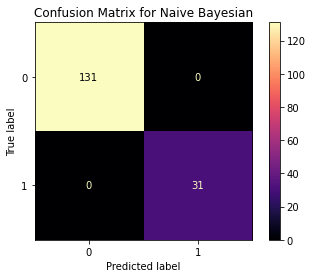

==============Support Vector Machine==============
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       131
           1       1.00      0.81      0.89        31

    accuracy                           0.96       162
   macro avg       0.98      0.90      0.94       162
weighted avg       0.96      0.96      0.96       162



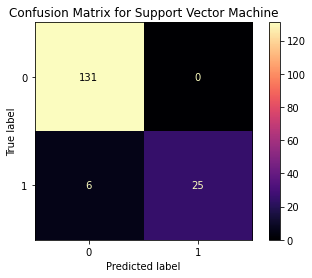

================Gradient Boosting=================
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       131
           1       1.00      1.00      1.00        31

    accuracy                           1.00       162
   macro avg       1.00      1.00      1.00       162
weighted avg       1.00      1.00      1.00       162



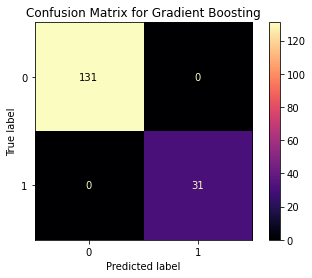

===========Random Forest Decision Tree============
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       131
           1       1.00      1.00      1.00        31

    accuracy                           1.00       162
   macro avg       1.00      1.00      1.00       162
weighted avg       1.00      1.00      1.00       162



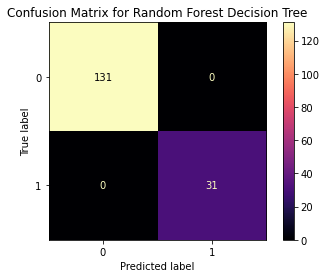

==================Decision Tree===================
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       131
           1       1.00      1.00      1.00        31

    accuracy                           1.00       162
   macro avg       1.00      1.00      1.00       162
weighted avg       1.00      1.00      1.00       162



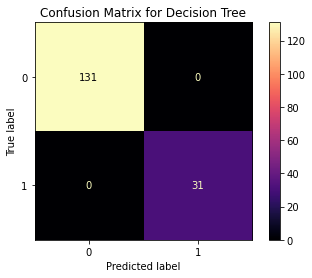

===============Logistic Regression================
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       131
           1       1.00      1.00      1.00        31

    accuracy                           1.00       162
   macro avg       1.00      1.00      1.00       162
weighted avg       1.00      1.00      1.00       162



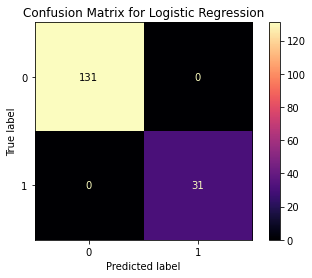

In [201]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Assuming you have defined your models and their corresponding names somewhere above

T = T.astype('int')
X_train, X_test, t_train, t_test = train_test_split(X, T, test_size=0.20, random_state=0)

models = [["K-Nearest Neighbor",knn],["Naive Bayesian", bayes],["Support Vector Machine",svm_classifier],["Gradient Boosting",gb_classifier],["Random Forest Decision Tree",rf_classifier],["Decision Tree",tree_regressor],["Logistic Regression",lr]]

# loop through each model in models array
for model_name, model_instance in models:
    print("{:=^50s}".format(model_name))
    
    # Fit the model on the training data
    model_instance.fit(X_train, t_train)
    
    # Make predictions on the test data
    predictions = model_instance.predict(X_test)
    
    # Print classification report
    print(classification_report(t_test, predictions))
    
    # Generate confusion matrix
    cm = confusion_matrix(t_test, predictions)
    
    # Display confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(t_test))
    disp.plot(cmap=plt.cm.magma)
    plt.title('Confusion Matrix for ' + model_name) 
    plt.show()


It seems as if the Support Vector Machine model has one of the best accuracies compared to any other model. Lets try and see if we can fine tune by using GridSearchCV to see if we can find the best hyperparemters for our model.

In [202]:
from sklearn.model_selection import GridSearchCV

#parameters for SVC
# C - float - positive float
# Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive.
# kernel - {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} - default: 'rbf'
# Specifies the kernel type to be used in the algorithm. 'linear' uses a linear kernel, 'poly' uses a polynomial kernel, 'rbf' uses a radial basis function kernel, and 'sigmoid' uses a sigmoid kernel.
# degree - int - positive integer - applicable only to 'poly' kernel
# Degree of the polynomial kernel function ('poly'). Ignored by all other kernels.
# gamma - {'scale', 'auto'} or float - positive float - applicable to 'rbf', 'poly', and 'sigmoid' kernels
# Kernel coefficient for 'rbf', 'poly', and 'sigmoid'. If 'scale' is selected, it is calculated as 1 / (n_features * X.var()) and if 'auto', it uses 1 / n_features.
# probability - bool - True or False
# Whether to enable probability estimates. This must be enabled prior to calling `fit`, and it slows down the training process.

param_grid = {'C':[0.1, 1, 10, 100], 'kernel':['rbf', 'linear','rbf','sigmoid']}

grid_search = GridSearchCV(svm_classifier, param_grid, cv=5)
grid_search.fit(X_train, t_train)
print("Best parameters:", grid_search.best_params_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test, t_test)
print("Test accuracy:", accuracy)

Best parameters: {'C': 10, 'kernel': 'linear'}
Test accuracy: 1.0


Hyperparemter values shown in graph

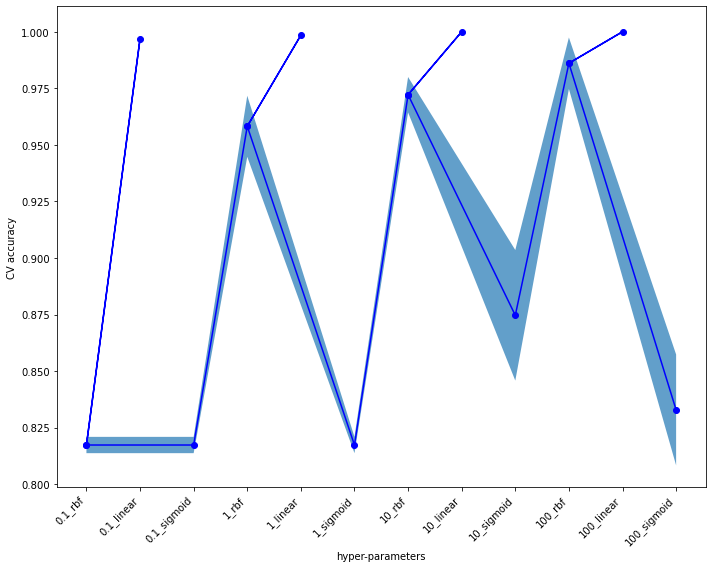

In [203]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

param_names = ["{}_{}".format(p['C'], p['kernel']) for p in grid_search.cv_results_['params']]


plt.figure(figsize=(10,8))
rng = range(len(param_names))

plt.plot(param_names,  grid_search.cv_results_['mean_test_score'], 'bo-')
plt.fill_between(param_names,  grid_search.cv_results_['mean_test_score'] + grid_search.cv_results_['std_test_score'],  grid_search.cv_results_['mean_test_score'] - grid_search.cv_results_['std_test_score'], alpha=0.7)

plt.gca().xaxis.set_major_locator(MultipleLocator(1))

plt.xlabel("hyper-parameters")
plt.ylabel("CV accuracy")

plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()
